In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


zsh:1: command not found: pip


In [4]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Step 1: Clean the Data

SyntaxError: invalid syntax (1045235830.py, line 1)

In [6]:
# We'll use only a few relevant columns for simplicity
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Display cleaned data
df.head()


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0,22.0,1,7.2500
1,1,1,1,38.0,1,71.2833
2,1,3,1,26.0,0,7.9250
3,1,1,1,35.0,1,53.1000
4,0,3,0,35.0,0,8.0500


In [ ]:
Step 2: Prepare Features and Labels (Just Splitting)

In [7]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Label

# Split into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
Step 3: Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred_tree = tree_model.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Accuracy (Decision Tree): 0.7412587412587412
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        87
           1       0.69      0.61      0.65        56

    accuracy                           0.74       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.74      0.74      0.74       143

[[72 15]
 [22 34]]


In [10]:
Step 4: Random Forest

SyntaxError: invalid syntax (424458551.py, line 1)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred_rf = rf_model.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Accuracy (Random Forest): 0.7692307692307693
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        87
           1       0.70      0.71      0.71        56

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143

[[70 17]
 [16 40]]


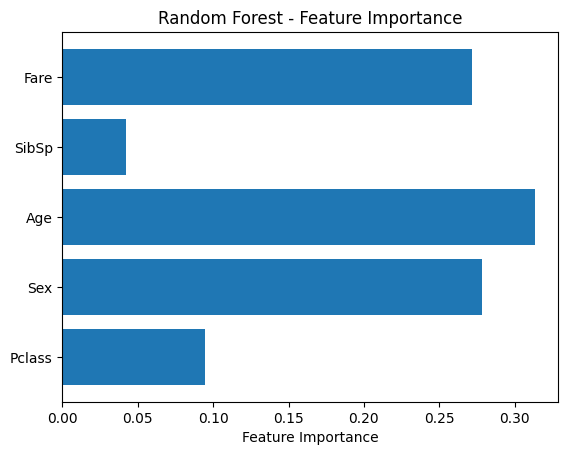

In [13]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()
